In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from skimage.transform import resize

In [2]:
def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hog = cv2.HOGDescriptor()
    features = hog.compute(gray)
    print(features)
    return features.flatten()

In [3]:
def load_images_from_directory(directory):
    images = []
    labels = []
    class_names = []
    for root,dirs,files, in os.walk(directory):
        for class_name in dirs:
            class_dir = os.path.join(root, class_name)
            for filename in os.listdir(class_dir):
                img_path = os.path.join(class_dir, filename)
                image = cv2.imread(img_path)
                if image is not None:
                    images.append(image)
                    labels.append(class_name)
                    class_names.append(class_name)
    return images, labels, class_names

In [4]:
def visualize_class_distribution(labels, class_names):
    class_counts = {class_name: labels.count(class_name) for class_name in set(class_names)}
    plt.bar(class_counts.keys(), class_counts.values())
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.show()
    total_samples = sum(class_counts.values())
    for class_name, count in class_counts.items():
        percentage = (count / total_samples) * 100
        print(f'{class_name}: {count} samples ({percentage:.2f}%)')

In [5]:
directory = 'dataset200/train'

In [6]:
images, labels, class_names = load_images_from_directory(directory)

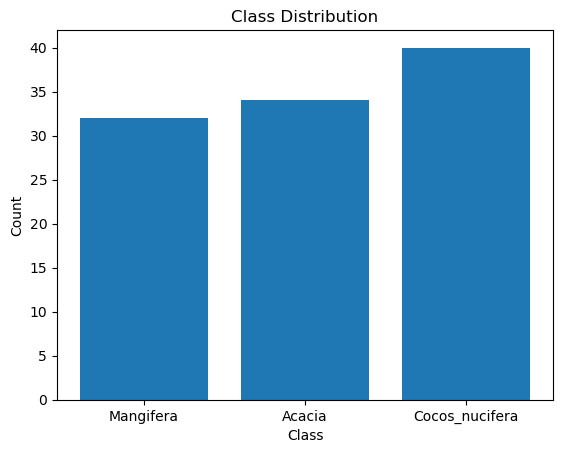

Mangifera: 32 samples (30.19%)
Acacia: 34 samples (32.08%)
Cocos_nucifera: 40 samples (37.74%)


In [7]:
visualize_class_distribution(labels, class_names)

In [8]:
features = np.array([extract_features(img) for img in images])

[0.19355883 0.18274534 0.16172057 ... 0.284248   0.16773617 0.11241294]
[0.15563142 0.23538916 0.14571449 ... 0.06028985 0.16268593 0.26797843]
[0.22626922 0.20872176 0.16894391 ... 0.3892944  0.10853568 0.03147558]
[0.24010162 0.24010162 0.16422574 ... 0.11571288 0.17523211 0.25796646]
[0.15651067 0.23140308 0.22789687 ... 0.12220321 0.2535933  0.2535933 ]
[0.20638786 0.17472029 0.18831633 ... 0.10214774 0.04104645 0.03604883]
[0.22711948 0.20909518 0.07188046 ... 0.10423375 0.13587211 0.15028386]
[0.18399377 0.13533522 0.1352776  ... 0.14952493 0.17985149 0.1456881 ]
[0.11567257 0.11987711 0.11780095 ... 0.11501475 0.2099907  0.28069553]
[0.22730091 0.22378239 0.12549323 ... 0.14309081 0.25652322 0.25652322]
[0.06952638 0.02155636 0.04408224 ... 0.01302644 0.02827035 0.08703139]
[0.09644279 0.01608943 0.00228329 ... 0.13049954 0.30793282 0.30793282]
[0.14528368 0.2202407  0.21066944 ... 0.28732818 0.31653625 0.17366274]
[0.19028398 0.24153465 0.20939296 ... 0.29411858 0.14409061 0.06

In [9]:
X_train,X_test,y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state=42)

In [10]:
svm_classifier = SVC(kernel='linear')

In [11]:
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [12]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
y_pred_svm = svm_classifier.predict(X_test)
y_pred_rfc = rfc.predict(X_test)

In [14]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM accuracy score:", accuracy_svm * 100)

SVM accuracy score: 95.45454545454545


In [15]:
accuracy_rf = accuracy_score(y_test, y_pred_rfc)
print("Random Forest Classifier Accuracy:", accuracy_rf)

Random Forest Classifier Accuracy: 0.6818181818181818


# Pre processing grayscale and resize

In [16]:
def preprocess_image(image_path, save_path):
    image =cv2.imread(image_path)
    
    resized_image = cv2.resize(image,(200,266))
    
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(save_path, grayscale_image)
    return grayscale_image

In [17]:
input_image_path = 'dataset200/val/Cocos_nucifera/IMG_3469.jpg'
save_path = 'pre_process.jpg'
preprocessed_image = preprocess_image(input_image_path, save_path)

In [18]:
input_image = cv2.imread('pre_process.jpg')

if input_image is not None:
    input_features = extract_features(input_image).reshape(1,-1)
    svm_pred = svm_classifier.predict(input_features)[0]
    rfc_pred = rfc.predict(input_features)[0]
    # Display the input image
    print("SVM PRED:", svm_pred)
    print("RFC PRED:", rfc_pred)
else:
    print("Error unable to read input image")

[0.17960107 0.03989264 0.03711092 ... 0.23671289 0.23671289 0.16671169]
SVM PRED: Cocos_nucifera
RFC PRED: Cocos_nucifera
